# Classification de phases et extraction de masques associés

## Prérequis

### Fichiers nécessaires :
- Les données élémentaires. 

Il peut s'agir de cartes élémentaires (.bmp ou .tif), mais aussi des cartes des données brutes (.txt) ou encore du cube complet (.raw et du fichier annexe .rpl)

<center><img src="Data/lead_ore_Fe.bmp" width="400"/>

Figure 1 : Exemple de carte élémentaire : Fer.

La carte est un fichier de type bitmap (.bmp), c'est-à-dire qu'elle ne contient plus les informations du nombre de coups par énergies. 

Elle contient seulement des informations de couleur : 3 nombres entre 0 et 255 par pixels correspondant aux intensités RVB.

- Un tableur constitué d'une colonne Element et de colonnes portant le nom des masques souhaités.

Element | Galene | Chalcopyrite | Siderite | Quartz
- | - | - | - |- 
Al |  |  |  | 
As |  |  |  |
Ca |  |  |  |
Cl |  |  |  |
Cu |  |  |  |
Fe |  |  |  |
K |  |  |  |
Mg |  |  |  |
Mn |  |  |  |
Na |  |  |  |
Pb |  |  |  |
S |  |  |  |
Si |  |  |  |
Ti |  |  |  |
Couleur |  |  |  |

Les éléments indiqués doivent être disponibles sous forme de cartes élementaires dans le dossier.

Une couleur peut également être spécifiée lors de la création de la carte minéralogique complète. 

Il suffit de créer une ligne appeléé Couleur(s)/couleur(s)/Color(s)/color(s).

Les couleurs spécifiées doivent faire partie de la librairie matplotlib : https://matplotlib.org/3.1.0/gallery/color/named_colors.html

Si les fichiers utilisés sont de types .txt ou .raw (et .rpl associé):

Un rapport de deux images peut également être introduit : ici F3 et F4 correspondent aux pics de diffusion    élastique (Rayleigh diffusion) et diffusion inélastique (Compton).

### Les informations à rentrer dans chaque cellule correspondent soit :
- à une valeur comprise entre 0 et 1 si la carte utilisée est un fichier .bmp ou .tif.
- à une valeur correspondant à un nombre de coups si la carte utilisée est un fichier .txt ou .raw (et .rpl associée) et que l'utilisateur souhaite travailler avec les valeurs en nombres de coups. Il peut cependant aussi travailler avec des valeurs comprises entre 0 et 1. 

### Quelles types de valeurs entrer 
- Il peut s'agir d'un seul nombre. Si c'est un nombre à virgule, la séparation se fait par un point.
- Il peut s'agir d'une plage de valeurs ou les deux nombres sont séparés par un tiret (dash).

## Comment utiliser le programme

### Import de la librairie marcia

Dans un premier temps on ouvre un script python, ou une session via un terminal.  Il faut ensuite importer la librairie marcia.

In [1]:
import marcia as mc

### Chargement des données élémentaires

Il faut ensuite charger les données. Pour cela on créé un cube de données (3 dimensions) ou les 2 premières dimensions correspondent aux dimensions de l'echantillon (dimensions spatiales) et la troisième dimensions correspond aux informations pour chaque élément disponible. 

C'est comme si les cartes élémentaires étaient empilées.

In [2]:
data = mc.load('Data/lead_ore','.bmp')

Il faut maintenant charger le tableur utilisé pour faire la classification des élements par masques. Ici les masques sont des minéraux, mais peuvent avoir une signification différente selon le cas d'étude.

### Chargement du fichier de parametrage de la classification par phases

In [3]:
mask = mc.load_mask('Data/Mask.xlsx')

On obtient ainsi un cube des données élémentaires. Pour retrouver l'index de chaque élément, il suffit d'afficher le dictionnaire des indexations élémentaires correspondantes:

In [4]:
data.elements

{0: 'Al',
 1: 'As',
 2: 'Ca',
 3: 'Cl',
 4: 'Cu',
 5: 'Fe',
 6: 'K',
 7: 'Mg',
 8: 'Mn',
 9: 'Na',
 10: 'Pb',
 11: 'S',
 12: 'Si',
 13: 'Ti'}

Une fois ce cube créé, on peut également afficher la carte élémentaire avec l'histogramme des intensités. Pour obtenir l'histogramme du plomb (élément discriminant de la galène dans notre échantillon), on rentre la commande suivante : 

### Affichage des zones de concentrations

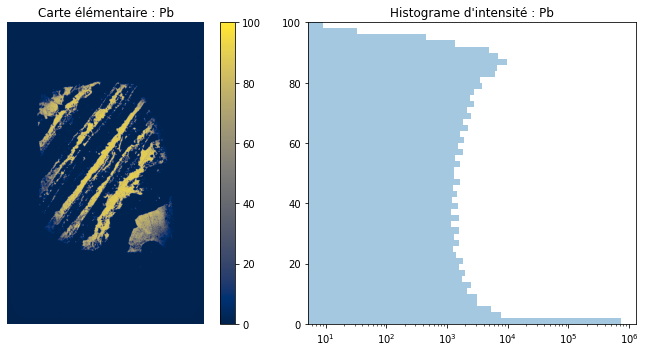

In [5]:
mc.hist(data,'Pb')

On remarque ainsi que dans l'échantillon, il y a une population entre 80% et 100% du pic d'intensité, surement correspondant à la galène. Le pic le plus elevé d'intensité 0 correspond au bruit de fond.

Les données d'entrées étant des images, les intensités calculées sont ainsi normalisées à 100, où 100 correspond au pixel d'intensité maximale de l'élément voulu. En connaissant les formules des minéraux présents, il est possible de caractériser les différentes populations.

La population ayant l'intensité la plus élevée en plomb correspond à de la galène (PbS).

Ainsi dans le tableur d'entrée, il est possible de spécifier les valeurs du plomb pour la galène : ici il est difficile de définir une limite basse, on peut ainsi considérer de garder toutes les valeurs au dessus du bruit de fond : 0.05. Si besoin, on pourra affiner cette valeur plus tard dans le tableau.

Element | Galene | Chalcopyrite | Siderite | Quartz
- | - | - | - |- 
Al |  |  |  | 
As |  |  |  |
Ca |  |  |  |
Cl |  |  |  |
Cu |  |  |  |
Fe |  |  |  |
K |  |  |  |
Mg |  |  |  |
Mn |  |  |  |
Na |  |  |  |
Pb |  0.05|  |  |
S |  |  |  |
Si |  |  |  |
Ti |  |  |  |
Couleur |  |  |  |

### Création du cube de phases

In [6]:
mineral_cube = mc.mineralcube_creation(data,mask)

### Modification des paramètres de classification de phases

Pour modifier les valeurs des seuils des masques définis, deux méthodes sont possibles : 
- Modifier le tableur a l'aide de Microsoft Excel ou LibreOffice et le recharger dans python; 

In [7]:
mask = mc.load_mask('Data/Mask.xlsx')

- Modifier directement les valeurs dans pythons

In [8]:
mask.set_value('Galene', 'Pb', '0.05')

Maitenant que des valeurs ont été spécifiées pour un minéral, on peut également créer le cube des masques minéralogiques. Il se présente sous la même forme que celui des éléments, mais ne possède que des 1 la où le pixel est associé au minéral, et n'est pas assigné si le pixel n'est pas dans le minéral

De même que pour les éléments, il existe un dictionnaire des minéraux permettant de retrouver l'index du minéral dans le cube créé

In [9]:
mineral_cube.elements

{0: 'Galene', 1: 'Chalcopyrite', 2: 'Siderite', 3: 'Quartz'}

Etant donné que seul deux minéraux ont été définis pour l'instant dans le classeur, seuls deux masques ont rééllement été créés. On peut visualiser chaque masque avec la commande suivante : 
`mc.hist(mineral_cube,'nom')`. 

Le nom étant celui défini dans le tableur par l'utilisateur.

Ainsi `mc.hist(mineral_cube,'Galene')` affiche le masque de la galène.

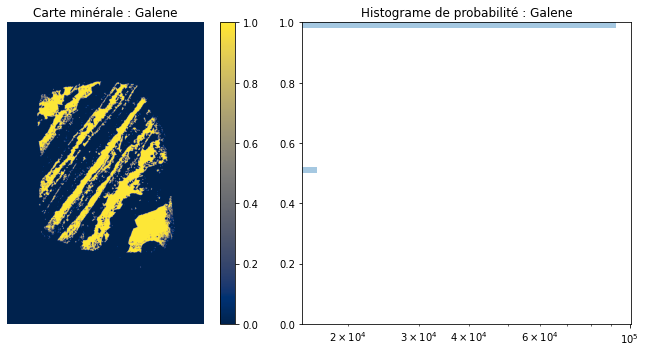

In [10]:
mc.hist(mineral_cube,'Galene')

### Histogramme dans une phase spécifique

On peut egalement afficher la carte elementairre et l'histogramme associé d'un élément compris dans un masque.

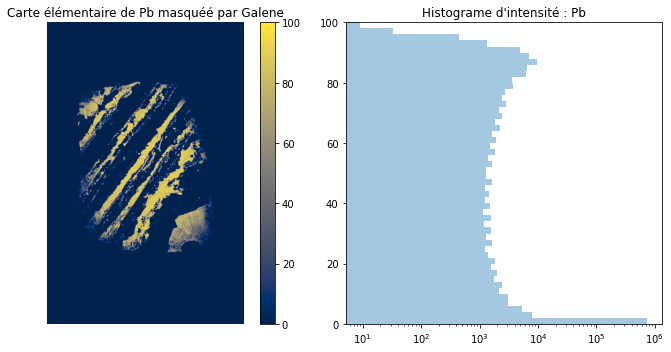

In [11]:
mc.hist_in_mask(data, mineral_cube, 'Pb', 'Galene' )

### Classification totale des phases et pourcentages associés

Il est également possible d'afficher la classification minéralogique totale sur une seule image :

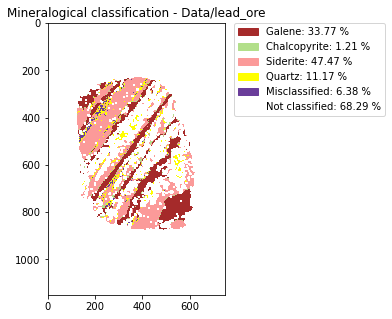

In [12]:
mc.plot_minerals(mineral_cube)

L'image ainsi obtenue montre le minéral classifié ainsi que sa proportion. Sont égalements affichés les pixels classés dans plusieurs minéraux et sont appelés mixtes. La somme des proportions des minéraux et des mixtes boucle à 100%. La proportion de pixels non indexés sur toute l'images est également affichés. Ici, cela montre que 87.2% des pixels n'ont pas encore été classés et que sur sur les 12.8% classés, 100% correspondent à de la galène.

En analysant les différents histogrammes des éléments on peut réaliser des seuils pour les autres minéraux et réaliser une classification complète. Un exempel de remplissage du tableur est presenté ci-dessous. Il n'est cependant pas unique et est à l'appréciation de l'utilisateur qui connait son echantillon et sa minéralogie.

Element | Galene | Chalcopyrite | Siderite | Quartz
- | - | - | - |- 
Al |  |  |  | 
As |  |  |  |
Ca |  |  |0.2  |
Cl |  |  |  |
Cu |  | 0.9 |  |
Fe |  | 0.9 | 0.05 - 0.89 |
K |  |  |  |
Mg |  |  |  |
Mn |  |  |  |
Na |  |  |  |
Pb |  0.05|  |  |
S | 0.05 |0.05  |  |
Si |  |  | 0.7 |
Ti |  |  |  |
Couleur | Brown |  | Yellow |

### Déterminer les phases couplées dans les mixtes

Parmi les mauvaises classifications il est possible de determiner les pourcentages de chaque melange.

In [13]:
mineral_cube.compute_duplicate_stats()

,0,1,2,3,Percentage of Mixed
0,Galene,0,Siderite,0,89.314158
1,Galene,Chalcopyrite,0,0,4.033690
2,0,0,Siderite,Quartz,3.764396
3,Galene,0,0,Quartz,2.887756


On remarque que la plupart des mixtes sont entre la galene et la siderite car nous ne sommes pas assez restrictif sur les teneurs pour chaque phases.